In [1]:
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Helvetica']
import matplotlib.pyplot as plt
import matplotlib as mpl

from faculty_hiring.misc.plotting import *  # Definitions for LABEL_SIZE and such
from faculty_hiring.misc.gaussian_kde import gaussian_kde

from collections import Counter
from faculty_hiring.parse import faculty_parser, institution_parser
from faculty_hiring.parse import load
from scipy.stats import ttest_ind, ks_2samp
import numpy as np
import palettable

In [2]:
cmap = palettable.tableau.Tableau_10.mpl_colormap
colors = palettable.tableau.Tableau_10.mpl_colors

In [5]:
faculty_file = '/Users/samway/Documents/Work/ClausetLab/projects/faculty_hiring/data/faculty_cs_CURRENT.txt'
inst_file = '/Users/samway/Documents/Work/ClausetLab/projects/faculty_hiring/data/inst_cs.txt'
dblp_dir = '/Users/samway/Documents/Work/ClausetLab/projects/faculty_hiring/data/profiles_DBLP_all/'
gs_dir = '/Users/samway/Documents/Work/ClausetLab/projects/faculty_hiring/data/profiles_GS_all/'

topic_descriptions = \
    ['Computer Architecture',
     'Image/Signal Processing',
     'Data/Text Mining',
     'Software Engineering',
     'AI, Machine Learning',
     'Communication Networks',
     'Robotics, HCI, Social Systems',
     'Theory',
     'Computational Biology',
     'Programming Languages']
num_topics = len(topic_descriptions)

In [7]:
inst = institution_parser.parse_institution_records(open(inst_file))
faculty = load.load_assistant_profs(open(faculty_file), inst)
load.load_all_publications(faculty, dblp_dir=dblp_dir)

In [9]:
print len(faculty)

2659


In [8]:
num_gs_papers = []
num_dblp_papers = []

for i, f in enumerate(faculty):
    if 'gs_pubs' in f:
        num_gs_papers.append(len(f['gs_pubs']))
    if 'dblp_pubs' in f:
        num_dblp_papers.append(len(f['dblp_pubs']))
        
print len(num_gs_papers), 'GS records'
print len(num_dblp_papers), 'DBLP records'
print len(faculty), 'records'

0 GS records
2528 DBLP records
2659 records


In [6]:
left_out = 0
left_out_probs_wrong = 0

for i, f in enumerate(faculty):
    if 'gs_pubs' in f and 'dblp_pubs' not in f:
        left_out += 1
        if len(f['gs_pubs']) > 500:
            left_out_probs_wrong += 1
        
print left_out, left_out_probs_wrong

60 12


In [7]:
probably_wrong = 0

for i, f in enumerate(faculty):
    if 'gs_pubs' in f and len(f['gs_pubs']) > 1000:
        probably_wrong += 1
        
print probably_wrong

67


In [8]:
faculty[0]['topic_dist']

array([  4.44642960e-04,   4.69372178e-05,   4.68957206e-02,
         7.03006670e-01,   6.03599568e-05,   2.05598690e-01,
         1.05158404e-02,   6.59202979e-05,   3.90049920e-03,
         2.94647191e-02])

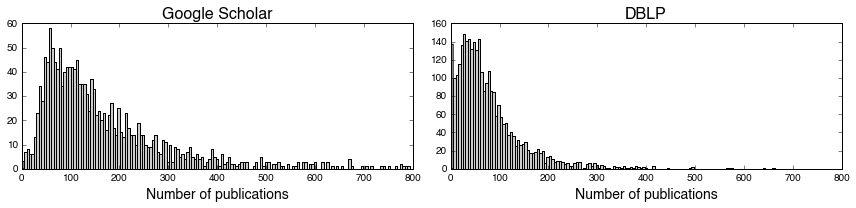

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(12,3))

bins = np.linspace(0, 1000, 200)
axs[0].hist(num_gs_papers, bins=bins, color='0.8')
axs[1].hist(num_dblp_papers, bins=bins, color='0.8')

axs[0].set_xlim((0,800))
axs[1].set_xlim((0,800))

axs[0].set_title('Google Scholar', fontsize=TITLE_SIZE)
axs[1].set_title('DBLP', fontsize=TITLE_SIZE)
axs[0].set_xlabel('Number of publications', fontsize=LABEL_SIZE)
axs[1].set_xlabel('Number of publications', fontsize=LABEL_SIZE)

plt.show()

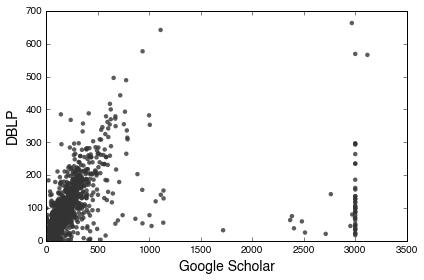

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

gs = []
dblp = []
for i, f in enumerate(faculty):
    if 'gs_pubs' in f and 'dblp_pubs' in f:
        gs.append(len(f['gs_pubs']))
        dblp.append(len(f['dblp_pubs']))
        
ax.scatter(gs, dblp, c='0.2', edgecolor='None', alpha=0.8)
ax.set_xlabel('Google Scholar', fontsize=LABEL_SIZE)
ax.set_ylabel('DBLP', fontsize=LABEL_SIZE)
ax.set_xlim(0, 3500)
ax.set_ylim(0, 700)
plt.show()

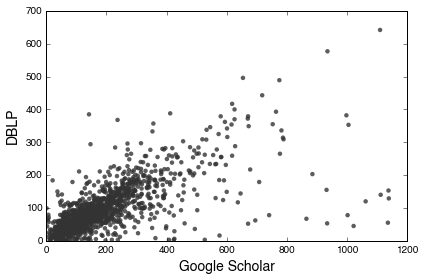

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

gs = []
dblp = []
for i, f in enumerate(faculty):
    if 'gs_pubs' in f and 'dblp_pubs' in f:
        gs.append(len(f['gs_pubs']))
        dblp.append(len(f['dblp_pubs']))
        
ax.scatter(gs, dblp, c='0.2', edgecolor='None', alpha=0.8)
ax.set_xlabel('Google Scholar', fontsize=LABEL_SIZE)
ax.set_ylabel('DBLP', fontsize=LABEL_SIZE)
ax.set_xlim(0, 1200)
ax.set_ylim(0, 700)
plt.show()

In [12]:
# Who are all those people on the right? The ones with 1500+ publications?
for f in faculty:
    if 'gs' in f:
        num_pubs = len(f['gs_pubs'])
        if num_pubs > 1500:
            print num_pubs, f['facultyName']

3000 Yi Chen
2971 Yalin Wang
3000 Hao Chen
3000 John Anderson
3118 Tao Jiang
3000 Yuan-Fang Wang
3000 Xifeng Yan
3000 Wei Wang
2482 Zizhong Chen
2713 Wensheng Wu
3000 Insup Lee
2368 Jianbo Shi
3000 Yin Zhang
3000 Yuke Wang
3000 Weining Zhang
3000 Li Zhang
3000 Xudong He
3000 Ling Liu
3000 Haesun Park
2997 Jim X. Chen
3000 Shigang Chen
3000 Kang Li
2763 Carl K. Chang
3000 Xiaoqiu Huang
3000 Ruigang Yang
1717 Seung-Jong Park
3000 Vipin Kumar
3000 Yi Shang
3000 Huajie Zhang
3000 Jason T. L. Wang
3000 Xuxian Jiang
2385 Xiaosong Ma
2405 Shaoen Wu
2967 Jack J. Dongarra
3000 Hai Zhou
3000 Yan Chen
3000 Ying Wu
3000 Ling Wang
3000 Jundong Liu
3000 Chengcui Zhang
2512 Jeongkyu Lee
3000 Yuan Xie
3000 Suresh Singh
3000 Kai Li
2953 Jianjun Hu
3000 Qingshan Liu
3000 Aidong Zhang
3000 Min Sik Kim
3000 Richard Hao Zhang
3000 Yixin Chen
3000 Ming Li
3000 Hongwei Zhang
3000 Keke Chen
3000 Jie Wu
3000 Hui Jiang
3000 Eun Jung Kim
3000 Jyh-Charn (Steve) Liu


In [13]:
for f in faculty:
    if 'dblp' in f:
        num_pubs = len(f['dblp_pubs'])
        if num_pubs > 450:
            print num_pubs, f['facultyName']

489 Christos Faloutsos
566 Tao Jiang
642 Sajal K. Das
496 Erik Demaine
577 Anil K. Jain
493 Vijay Kumar
663 Jack J. Dongarra
569 Jie Wu


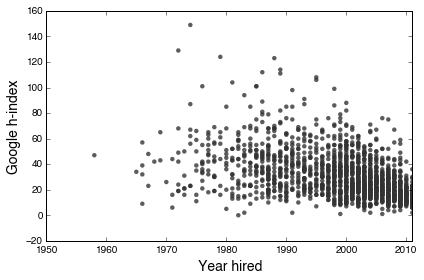

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

h_inds = []
start_years = []

for f in faculty:
    if 'gs_stats' in f:
        h_inds.append(f['gs_stats']['h-index'])
        start_years.append(f.first_asst_job_year)
        
ax.scatter(start_years, h_inds, c='0.2', edgecolor='None', alpha=0.8)
ax.set_xlabel('Year hired', fontsize=LABEL_SIZE)
ax.set_ylabel('Google h-index', fontsize=LABEL_SIZE)
ax.set_xlim(1950, 2011)
#ax.set_ylim(0, 700)
plt.show()  

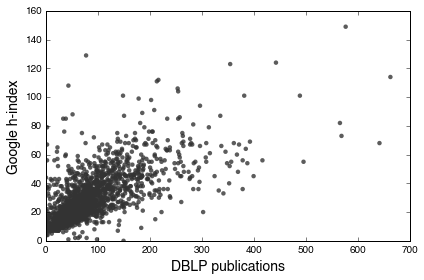

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

h_inds = []
dblp_pubs = []

for f in faculty:
    if 'gs_stats' in f and 'dblp_pubs' in f:
        h_inds.append(f['gs_stats']['h-index'])
        dblp_pubs.append(len(f['dblp_pubs']))
        
ax.scatter(dblp_pubs, h_inds, c='0.2', edgecolor='None', alpha=0.8)
ax.set_xlabel('DBLP publications', fontsize=LABEL_SIZE)
ax.set_ylabel('Google h-index', fontsize=LABEL_SIZE)
ax.set_xlim(0, 700)
ax.set_ylim(0, 160)
plt.show()  

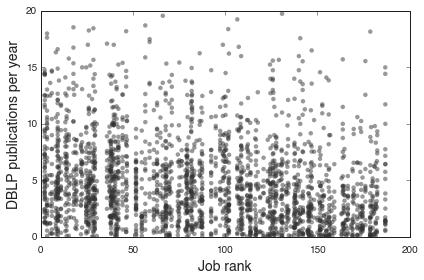

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

phd_ranks = []
dblp_pubs = []

for f in faculty:
    if 'dblp_pubs' in f:
        phd_ranks.append(inst.get(f.first_asst_job_location, inst['UNKNOWN'])['pi'])
        dblp_pubs.append(len(f['dblp_pubs']) / float(2015 - f.first_asst_job_year))

ax.scatter(phd_ranks, dblp_pubs, c='0.2', edgecolor='None', alpha=0.5)
ax.set_ylabel('DBLP publications per year', fontsize=LABEL_SIZE)
ax.set_xlabel('Job rank', fontsize=LABEL_SIZE)
ax.set_xlim(0, 200)
ax.set_ylim(0, 20)
plt.show()  

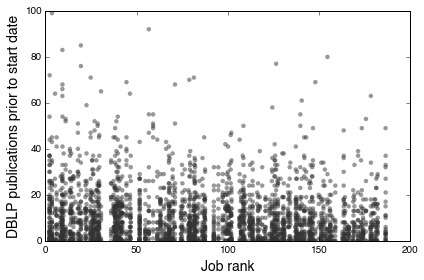

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

ranks = []
dblp_pubs = []

for f in faculty:
    if 'dblp_pubs' in f:
        ranks.append(inst.get(f.first_asst_job_location, inst['UNKNOWN'])['pi'])
        num_pubs = 0
        for pub in f['dblp_pubs']:
            if 'year' in pub and pub['year'] <= f.first_asst_job_year + 1:
                num_pubs += 1
        dblp_pubs.append(num_pubs)

ax.scatter(ranks, dblp_pubs, c='0.2', edgecolor='None', alpha=0.5)
ax.set_ylabel('DBLP publications prior to start date', fontsize=LABEL_SIZE)
ax.set_xlabel('Job rank', fontsize=LABEL_SIZE)
ax.set_xlim(0, 200)
ax.set_ylim(0, 100)
plt.show()  

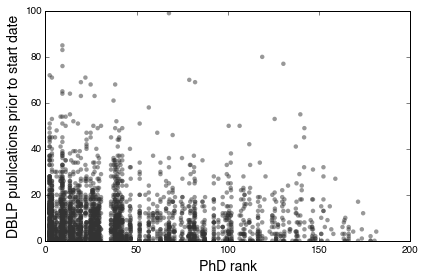

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

ranks = []
dblp_pubs = []

for f in faculty:
    if 'dblp_pubs' in f:
        ranks.append(inst.get(f.phd_location, inst['UNKNOWN'])['pi'])
        num_pubs = 0
        for pub in f['dblp_pubs']:
            if 'year' in pub and pub['year'] <= f.first_asst_job_year + 1:
                num_pubs += 1
        dblp_pubs.append(num_pubs)

ax.scatter(ranks, dblp_pubs, c='0.2', edgecolor='None', alpha=0.5)
ax.set_ylabel('DBLP publications prior to start date', fontsize=LABEL_SIZE)
ax.set_xlabel('PhD rank', fontsize=LABEL_SIZE)
ax.set_xlim(0, 200)
ax.set_ylim(0, 100)
plt.show()  

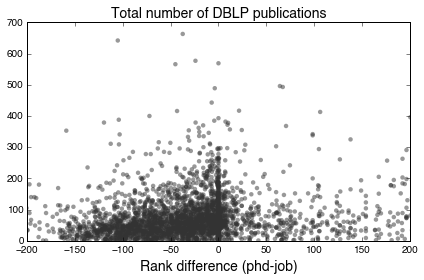

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

ranks = []
dblp_pubs = []

for f in faculty:
    if 'dblp_pubs' in f:
        first_job_rank = inst.get(f.first_asst_job_location, inst['UNKNOWN'])['pi']
        phd_rank = inst.get(f.phd_location, inst['UNKNOWN'])['pi']
        
        ranks.append(phd_rank - first_job_rank)
        num_pubs = len(f['dblp_pubs']) # 0 #len(f['dblp_pubs']) / (2015. - f.first_asst_job_year)
        #for pub in f['dblp_pubs']:
        #    if 'year' in pub and pub['year'] <= f.first_asst_job_year + 1:
        #        num_pubs += 1
        dblp_pubs.append(num_pubs)

ax.scatter(ranks, dblp_pubs, c='0.2', edgecolor='None', alpha=0.5)
ax.set_title('Total number of DBLP publications', fontsize=LABEL_SIZE)
ax.set_xlabel('Rank difference (phd-job)', fontsize=LABEL_SIZE)
ax.set_xlim(-200, 200)
ax.set_ylim(0, 700)
plt.show()  

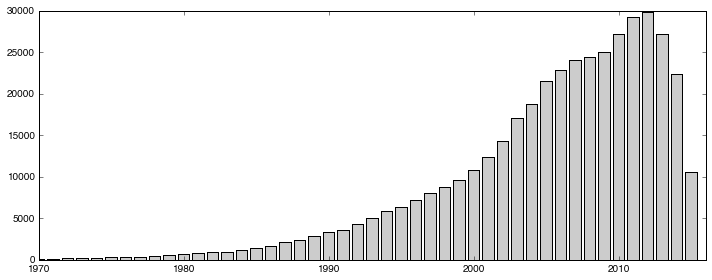

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(10,4))

years = []
for f in faculty:
    if 'gs_pubs' in f:
        for pub in f['gs_pubs']:
            if pub['year'] > 1960:
                years.append(pub['year'])
            
year_counts = Counter(years)
years = np.arange(1970, 2016)
counts = np.zeros_like(years)
for i, y in enumerate(years):
    counts[i] = year_counts.get(y, 0)
    
ax.bar(years, counts, color='0.8', align='center')
ax.set_xlim(1970, 2016)
    
plt.show()

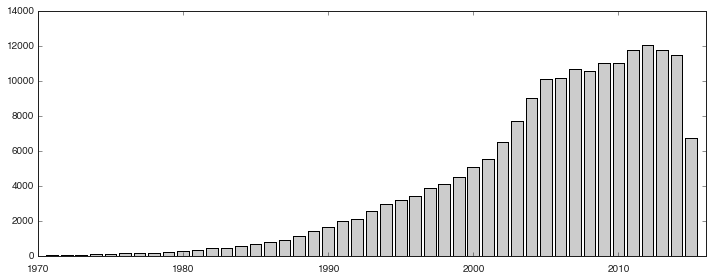

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(10,4))

years = []
for f in faculty:
    if 'dblp_pubs' in f:
        for pub in f['dblp_pubs']:
            if pub['year'] > 1960:
                years.append(pub['year'])
            
year_counts = Counter(years)
years = np.arange(1970, 2016)
counts = np.zeros_like(years)
for i, y in enumerate(years):
    counts[i] = year_counts.get(y, 0)
    
ax.bar(years, counts, color='0.8', align='center')
ax.set_xlim(1970, 2016)
    
plt.show()

## By Topic

In [13]:
gs_counts = np.zeros_like(faculty[0]['topic_dist'], dtype=float)
gs_norm = np.zeros_like(gs_counts)
dblp_counts = np.zeros_like(gs_counts)
dblp_norm = np.zeros_like(gs_counts)

for f in faculty:
    years_working = 2015 - f.first_asst_job_year
    if 'dblp_pubs' in f and 'topic_dist' in f:
        dblp_counts += float(len(f['dblp_pubs'])) / years_working * f['topic_dist']
        dblp_norm += f['topic_dist']
    if 'gs_pubs' in f and 'topic_dist' in f:
        gs_counts += float(len(f['gs_pubs'])) / years_working * f['topic_dist']
        gs_norm += f['topic_dist']
        
dblp_counts /= dblp_norm
gs_counts /= gs_norm

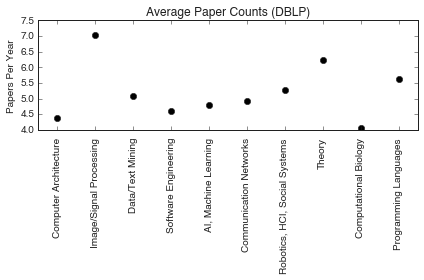

In [14]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(dblp_counts, 'ko')
xpad = 0.5
ax.set_xlim(-xpad, num_topics-xpad)
ax.set_xticks(xrange(10))
ax.set_xticklabels(topic_descriptions, rotation=90)
ax.set_title('Average Paper Counts (DBLP)')
ax.set_ylabel('Papers Per Year')
plt.show()

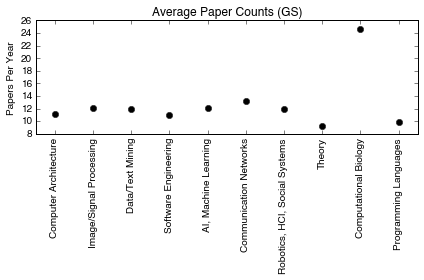

In [24]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(gs_counts, 'ko')
xpad = 0.5
ax.set_xlim(-xpad, num_topics-xpad)
ax.set_xticks(xrange(10))
ax.set_xticklabels(topic_descriptions, rotation=90)
ax.set_title('Average Paper Counts (GS)')
ax.set_ylabel('Papers Per Year')
plt.show()

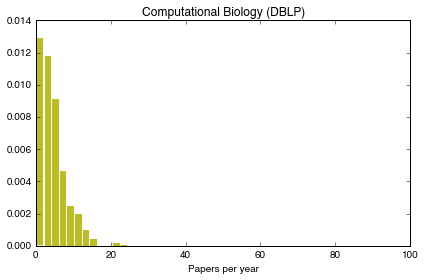

In [25]:
fig, ax = plt.subplots(figsize=(6,4))

selected_topic = 8

counts = []
weights = []
pub_type = 'dblp_pubs'

for f in faculty:
    years_working = 2015 - f.first_asst_job_year
    if pub_type in f and 'topic_dist' in f:
        counts.append(float(len(f[pub_type]))/ years_working)
        weights.append(f['topic_dist'][selected_topic])

bins = np.linspace(0, 100, 50)
weights = np.array(weights) * 1./(len(weights))
ax.hist(counts, bins=bins, weights=weights, color=colors[selected_topic], edgecolor='w')
ax.set_title('%s (%s)' % (topic_descriptions[selected_topic], 'DBLP'))
ax.set_xlabel('Papers per year')
plt.show()

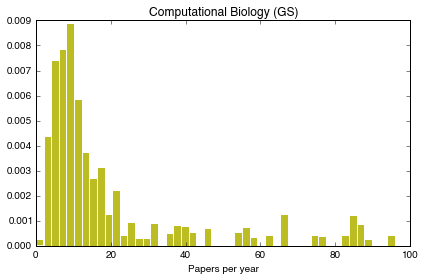

In [26]:
fig, ax = plt.subplots(figsize=(6,4))

selected_topic = 8

counts = []
weights = []
pub_type = 'gs_pubs'

for f in faculty:
    years_working = 2015 - f.first_asst_job_year
    if pub_type in f and 'topic_dist' in f:
        counts.append(float(len(f[pub_type]))/ years_working)
        weights.append(f['topic_dist'][selected_topic])

bins = np.linspace(0, 100, 50)
weights = np.array(weights) * 1./(len(weights))
ax.hist(counts, bins=bins, weights=weights, color=colors[selected_topic], edgecolor='w')
ax.set_title('%s (%s)' % (topic_descriptions[selected_topic], 'GS'))
ax.set_xlabel('Papers per year')
plt.show()

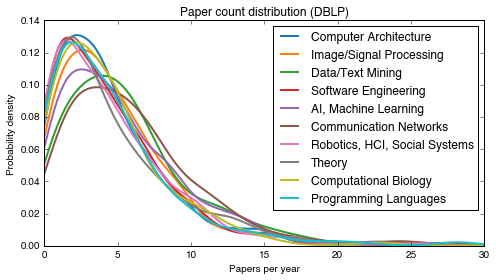

In [27]:
fig, ax = plt.subplots(figsize=(7,4))

x = linspace(0, 100, 1000)
pub_type = 'dblp_pubs'

for selected_topic in xrange(num_topics):
    counts = []
    weights = []
    
    for f in faculty:
        years_working = 2015 - f.first_asst_job_year
        if pub_type in f and 'topic_dist' in f:
            counts.append(float(len(f[pub_type]))/ years_working)
            weights.append(f['topic_dist'][selected_topic])

    pdf = gaussian_kde(counts, weights=weights)
    y = pdf(x)
    ax.plot(x,y,label=topic_descriptions[selected_topic], linewidth=2, c=colors[selected_topic])
ax.set_xlim(0, 30)
plt.legend()
ax.set_xlabel('Papers per year')
ax.set_ylabel('Probability density')
ax.set_title('Paper count distribution (DBLP)')
plt.show()

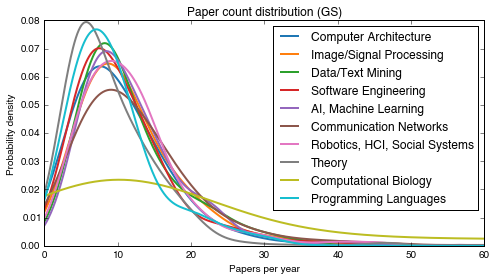

In [28]:
fig, ax = plt.subplots(figsize=(7,4))

x = linspace(0, 100, 1000)
pub_type = 'gs_pubs'

for selected_topic in xrange(num_topics):
    counts = []
    weights = []
    
    for f in faculty:
        years_working = 2015 - f.first_asst_job_year
        if pub_type in f and 'topic_dist' in f:
            counts.append(float(len(f[pub_type]))/ years_working)
            weights.append(f['topic_dist'][selected_topic])

    pdf = gaussian_kde(counts, weights=weights)
    y = pdf(x)
    ax.plot(x,y,label=topic_descriptions[selected_topic], linewidth=2, c=colors[selected_topic])
ax.set_xlim(0, 60)
plt.legend()
ax.set_xlabel('Papers per year')
ax.set_ylabel('Probability density')
ax.set_title('Paper count distribution (GS)')
plt.show()

## Before start date

ValueError: `dataset` input should have multiple elements.

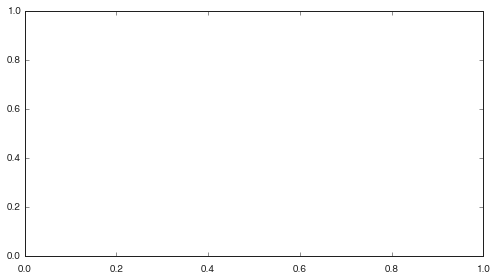

In [15]:
fig, ax = plt.subplots(figsize=(7,4))

x = linspace(0, 180, 1000)
pub_type = 'gs_pubs'

for selected_topic in xrange(num_topics):
    counts = []
    weights = []
    
    for f in faculty:
        start_year = f.first_asst_job_year
        if pub_type in f and 'topic_dist' in f:
            count = 0.
            for pub in f[pub_type]:
                if 'year' in pub and pub['year'] <= start_year + 1:
                    count += 1
            counts.append(count)
            if count > 80:
                print f['facultyName']
            weights.append(f['topic_dist'][selected_topic])

    pdf = gaussian_kde(counts, weights=weights)
    y = pdf(x)
    ax.plot(x,y,label=topic_descriptions[selected_topic], linewidth=2, c=colors[selected_topic])
#ax.set_xlim(0, 60)
plt.legend()
ax.set_xlabel('Papers within one year of start date')
ax.set_ylabel('Probability density')
ax.set_title('Paper count distribution (GS)')
plt.show()

0 9.27947643392 11.3323971257
1 15.8628201473 14.4308890456
2 12.2951220894 15.8057139876
3 10.0531548468 10.0902353213
4 9.70953835203 11.1464661996
5 10.779301526 12.0397905092
6 11.5246887724 12.3384211856
7 12.1795664597 13.3181115571
8 9.05985075738 9.61408126815
9 12.4023833408 12.2286557772
Overall average:  11.3145902726


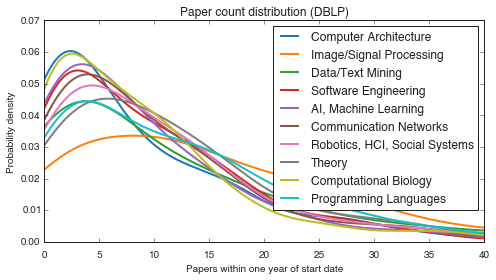

In [19]:
fig, ax = plt.subplots(figsize=(7,4))

def weighted_avg_and_std(values, weights):
    """
    Return the weighted average and standard deviation.

    values, weights -- Numpy ndarrays with the same shape.
    """
    average = numpy.average(values, weights=weights)
    variance = numpy.average((values-average)**2, weights=weights)  # Fast and numerically precise
    return (average, math.sqrt(variance))

x = linspace(0, 100, 1000)
pub_type = 'dblp_pubs'
averages = []

for selected_topic in xrange(num_topics):
    counts = []
    weights = []
    
    for f in faculty:
        start_year = f.first_asst_job_year
        if pub_type in f and 'topic_dist' in f:
            count = 0.
            for pub in f[pub_type]:
                if 'year' in pub and pub['year'] <= start_year + 1:
                    count += 1
            counts.append(count)
            weights.append(f['topic_dist'][selected_topic])

    count_average, count_std = weighted_avg_and_std(counts, weights=weights)
    averages.append(count_average)
    print selected_topic, count_average, count_std
    pdf = gaussian_kde(counts, weights=weights)
    y = pdf(x)
    ax.plot(x,y,label=topic_descriptions[selected_topic], linewidth=2, c=colors[selected_topic])
    
print 'Overall average: ', np.mean(averages)
ax.set_xlim(0, 40)
plt.legend()
ax.set_xlabel('Papers within one year of start date')
ax.set_ylabel('Probability density')
ax.set_title('Paper count distribution (DBLP)')
plt.show()

In [31]:
inst

{'All others': {'NRC95': '.',
  'Region': 'Earth',
  'USN2010': '.',
  'pi': 206.0,
  'pi_inv': 0.0048543689320388345,
  'pi_rescaled': 0.0048543689320388328,
  'u': 206},
 'Arizona State University': {'NRC95': 54,
  'Region': 'West',
  'USN2010': 53,
  'pi': 108.72,
  'pi_inv': 0.00919793966151582,
  'pi_rescaled': 0.47993787970541701,
  'u': 102},
 'Auburn University': {'NRC95': 92,
  'Region': 'South',
  'USN2010': 91,
  'pi': 126.69,
  'pi_inv': 0.007893282816323309,
  'pi_rescaled': 0.3921783125940107,
  'u': 123},
 'Boston University': {'NRC95': 52,
  'Region': 'Northeast',
  'USN2010': 47,
  'pi': 51.73,
  'pi_inv': 0.019331142470520007,
  'pi_rescaled': 0.75825828758961533,
  'u': 45},
 'Brandeis University': {'NRC95': 92,
  'Region': 'Northeast',
  'USN2010': 72,
  'pi': 84.55,
  'pi_inv': 0.011827321111768185,
  'pi_rescaled': 0.59797620675509378,
  'u': 79},
 'Brigham Young University': {'NRC95': 92,
  'Region': 'West',
  'USN2010': 91,
  'pi': 166.53,
  'pi_inv': 0.00600492

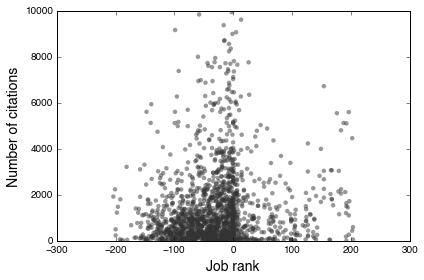

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

ranks = []
citations = []

for f in faculty:
    if 'gs_pubs' in f:
        inst_rank = inst.get(f.first_asst_job_location, inst['UNKNOWN'])['pi']
        phd_rank = inst.get(f.phd_location, inst['UNKNOWN'])['pi']
        ranks.append(phd_rank - inst_rank)
        
        num_citations = 0
        for pub in f['gs_pubs']:
            if 'cited' in pub:
                try:
                    if pub['year'] <= f.first_asst_job_year + 1:
                        num_citations += int(pub['cited'])
                except:
                    pass
        citations.append(num_citations)

ax.scatter(ranks, citations, c='0.2', edgecolor='None', alpha=0.5)
ax.set_ylabel('Number of citations', fontsize=LABEL_SIZE)
ax.set_xlabel('Job rank', fontsize=LABEL_SIZE)
ax.set_ylim(0, 10000)
plt.show()  

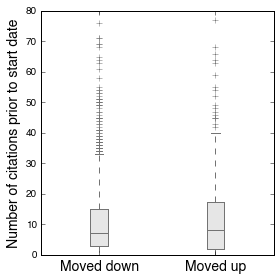

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))

phd_higher = []
job_higher = []

for f in faculty:
    if 'dblp_pubs' in f:
        inst_rank = inst.get(f.first_asst_job_location, inst['UNKNOWN'])['pi']
        phd_rank = inst.get(f.phd_location, inst['UNKNOWN'])['pi']
        
        num_citations = 0
        for pub in f['dblp_pubs']:
            if pub['year'] <= f.first_asst_job_year + 1:
                num_citations += 1
                
        if phd_rank > inst_rank:
            phd_higher.append(num_citations)
        elif inst_rank > phd_rank:
            job_higher.append(num_citations)

bp = ax.boxplot([job_higher, phd_higher], positions=[0,1], patch_artist=True) #facecolor='0.2', edgecolor='None', alpha=0.5)
color_bp(bp, 3*[0.9])
ax.set_ylabel('Number of citations prior to start date', fontsize=LABEL_SIZE)
#ax.set_xlabel('Job rank', fontsize=LABEL_SIZE)
ax.set_xticklabels(['Moved down', 'Moved up'], fontsize=LABEL_SIZE)
ax.set_xlim(-.5, 1.5)
ax.set_ylim((0, 80))
plt.show()  

In [34]:
print 'Moved down average: \t %.1f' % (np.mean(job_higher))
print 'Moved up average:   \t %.1f' % (np.mean(phd_higher))

ttest_ind(phd_higher, job_higher)

Moved down average: 	 10.6
Moved up average:   	 12.3


(2.8729814366550799, 0.0040972343332844148)

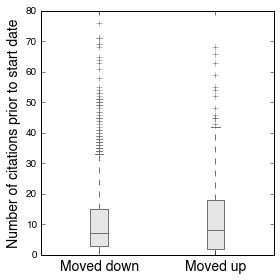

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))

moved_up = []
moved_down = []

for f in faculty:
    if 'dblp_pubs' in f:
        inst_rank = inst.get(f.first_asst_job_location, inst['UNKNOWN'])['pi']
        phd_rank = inst.get(f.phd_location, inst['UNKNOWN'])['pi']
        
        num_citations = 0
        for pub in f['dblp_pubs']:
            if pub['year'] <= f.first_asst_job_year + 1:
                num_citations += 1
        
        if phd_rank - inst_rank > 5:
            moved_up.append(num_citations)
        elif phd_rank - inst_rank < -5:
            moved_down.append(num_citations)

bp = ax.boxplot([moved_down, moved_up], positions=[0,1], patch_artist=True) #facecolor='0.2', edgecolor='None', alpha=0.5)
color_bp(bp, 3*[0.9])
ax.set_ylabel('Number of citations prior to start date', fontsize=LABEL_SIZE)
#ax.set_xlabel('Job rank', fontsize=LABEL_SIZE)
ax.set_xticklabels(['Moved down', 'Moved up'], fontsize=LABEL_SIZE)
ax.set_xlim(-.5, 1.5)
ax.set_ylim((0, 80))
plt.show()  

In [36]:
print 'Moved down average: \t %.1f' % (np.mean(moved_down))
print 'Moved up average:   \t %.1f' % (np.mean(moved_up))

ttest_ind(moved_down, moved_up)

Moved down average: 	 10.5
Moved up average:   	 12.4


(-2.9556806661016566, 0.003148435482703139)

In [37]:
len(moved_down)

2043

In [46]:
moved_up_men = []
moved_down_men = []

print 'JUST MEN'

for f in faculty:
    if f.sex != 'M':
        continue 
        
    if 'dblp_pubs' in f:
        inst_rank = inst.get(f.first_asst_job_location, inst['UNKNOWN'])['pi']
        phd_rank = inst.get(f.phd_location, inst['UNKNOWN'])['pi']
        
        num_citations = 0
        for pub in f['dblp_pubs']:
            if pub['year'] <= f.first_asst_job_year + 1:
                num_citations += 1
        
        if phd_rank - inst_rank > 5:
            moved_up_men.append(num_citations)
        elif phd_rank - inst_rank < -5:
            moved_down_men.append(num_citations)

print 'Moved down average: \t %.1f' % (np.mean(moved_down_men))
print 'Moved up average:   \t %.1f' % (np.mean(moved_up_men))

ttest_ind(moved_down_men, moved_up_men)

JUST MEN
Moved down average: 	 10.6
Moved up average:   	 12.2


(-2.2219655650869794, 0.026389169410623279)

In [43]:
moved_up_women = []
moved_down_women = []

print 'JUST WOMEN'

for f in faculty:
    if f.sex != 'F':
        continue 
        
    if 'dblp_pubs' in f:
        inst_rank = inst.get(f.first_asst_job_location, inst['UNKNOWN'])['pi']
        phd_rank = inst.get(f.phd_location, inst['UNKNOWN'])['pi']
        
        num_citations = 0
        for pub in f['dblp_pubs']:
            if pub['year'] <= f.first_asst_job_year + 1:
                num_citations += 1
        
        if phd_rank - inst_rank > 5:
            moved_up_women.append(num_citations)
        elif phd_rank - inst_rank < -5:
            moved_down_women.append(num_citations)

print 'Moved down average: \t %.1f' % (np.mean(moved_down_women))
print 'Moved up average:   \t %.1f' % (np.mean(moved_up_women))


JUST WOMEN
Moved down average: 	 10.1
Moved up average:   	 13.7


In [52]:
print 'Moved up:\t %d\t(%dM, %dF)' % (len(moved_up_men) + len(moved_up_women), len(moved_up_men), len(moved_up_women))
print 'Moved down:\t %d\t(%dM, %dF)' % (len(moved_down_men) + len(moved_down_women), len(moved_down_men), len(moved_down_women))

Moved up:	 506	(435M, 71F)
Moved down:	 2041	(1721M, 320F)


In [51]:
print ttest_ind(moved_up_women + moved_up_men, moved_down_men + moved_down_women)

(2.949118284297823, 0.0032158576241899774)
